In [49]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from plotnine import *   
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures


In [25]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df['MEDV'] = boston_dataset.target   #creating a new column of target values and add it to the dataframe (MEDV: The prices of the house )
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

<AxesSubplot:>

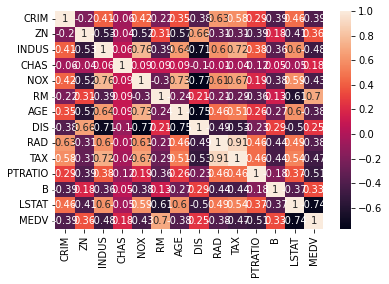

In [26]:
correlation_matrix = df.corr().round(2)    ##round: creating range from -1 to 1
sns.heatmap(data=correlation_matrix, annot=True)

#choosing RM & LSTAT as the main features

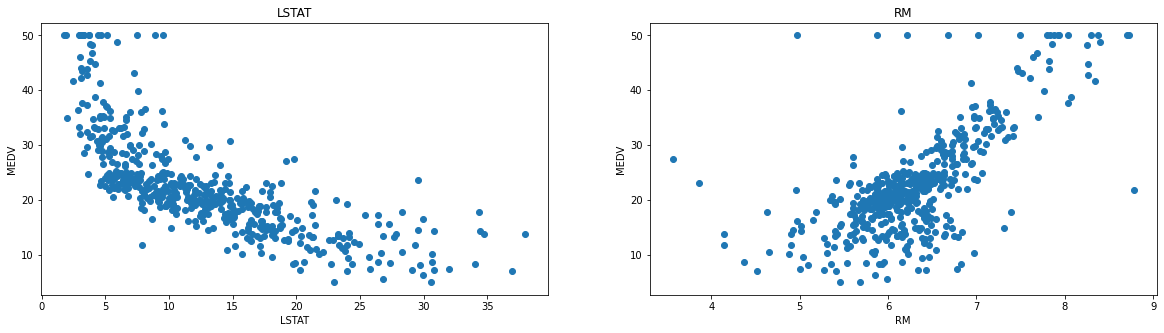

In [27]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [28]:
# X = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
rmse_array = []
X = df.drop('MEDV', axis = 1, inplace = False)
Y = df['MEDV']

# model = LinearRegression()
# model.fit(X_train, Y_train)
# y_predict = model.predict(X_train)
# rmse = (np.sqrt(mean_squared_error(Y_train, y_predict)))

### Divide dataset after importing into Train/Cross Validation/Test & Testing various hypothesis with different degrees

In [30]:
for i in range (1,10,1):
    features = PolynomialFeatures(degree=i, include_bias=False) #Generate feature matrix consisting of all polynomial combinations
    X_poly = features.fit_transform(X)
    X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, test_size = 0.3, random_state=5)
    X_valid, X_test, Y_valid, Y_test = train_test_split(X_test, Y_test, test_size = 0.5, random_state=5)
    reg_model = LinearRegression()
    reg_model.fit(X_train, Y_train)
    prediction = reg_model.predict(X_valid)
    rmse = np.sqrt(mean_squared_error(Y_valid, prediction))
    rmse_array.append(rmse)
print(rmse_array)

[5.638684731854739, 4.296844616073436, 246.1149216642198, 975.6174816320602, 732.6816548765657, 707.4845909121351, 683.8117897773595, 592.0800803087518, 5.638684731854739, 4.296844616073436, 246.1149216642198, 975.6174816320602, 732.6816548765657, 707.4845909121351, 683.8117897773595, 592.0800803087518, 530.1059316327398]


In [47]:
print("The optimal degree is\f", (rmse_array.index(min(rmse_array)))+1)

The optimal degree is 2


In [48]:
features = PolynomialFeatures(degree=2, include_bias=False) #Generate feature matrix consisting of all polynomial combinations
X_poly = features.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, test_size = 0.3, random_state=5)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_test, Y_test, test_size = 0.5, random_state=5)
reg_model = LinearRegression()
reg_model.fit(X_train, Y_train)
prediction = reg_model.predict(X_test)
print(np.sqrt(mean_squared_error(Y_test, prediction)))

4.218197075166558


### Applying Regularization

In [57]:
parameter = [1,0.1,0.001,0.0001]
for i in parameter:
    alpha = Lasso(alpha=i, max_iter=2000)
    alpha.fit(X_train,Y_train)
    train = alpha.score(X_train,Y_train)
    test = alpha.score(X_test,Y_test)
    print("For alpha = " + str(i), ',', "Lasso Train Score = ", train,',' ,"Lasso Test Score = ", test)

For alpha = 1 , Lasso Train Score =  0.8802523773574146 , Lasso Test Score =  0.8563303958630432
For alpha = 0.1 , Lasso Train Score =  0.900375681485863 , Lasso Test Score =  0.8652063800596108
For alpha = 0.001 , Lasso Train Score =  0.9197742672723525 , Lasso Test Score =  0.8344353008991072
For alpha = 0.0001 , Lasso Train Score =  0.9203473276586371 , Lasso Test Score =  0.8278843217375083
